In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# The MNIST dataset: Classification of handwritten digits

In [2]:
# load the MNIST data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/digits.csv'
digits = pd.read_csv(url)
digits.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel782  pixel783  pixel784  class  
0       0.0       0.0       0.0      5  
1       0.0       0.0       0.0      0  
2       0.0       0.0       0.0      4  
3       0.0       0.0       0.0      1  
4       0.0       0.0       0.0      9  

[5 rows x 785 columns]

In [3]:
# feature matrix and target vector
X = digits.iloc[:,0:784]
y = digits['class']

There are 5,000 images, and each image has 784 features. This is because each image is  28×28  pixels, and each feature simply represents one pixel's intensity, from 0 (white) to 255 (black).

Let's take a peek at one digit from the dataset. 
All we need to do is grab an instance's feature vector (this is, a row of X), reshape it to a $28\times 28$ array, and display it using `plt.imshow()`

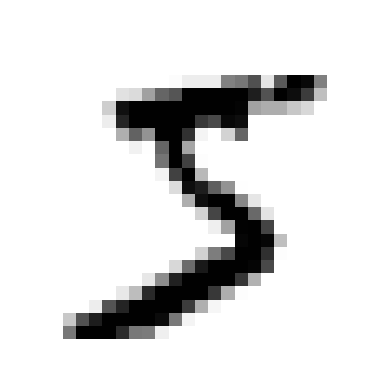

In [4]:
some_digit = X.loc[0,:].values
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = 'binary')
plt.axis('off')
plt.show()

This looks like a 5, and indeed that's what the label tells us

In [5]:
y[0]

5

The following figure shows a few more images from the dataset

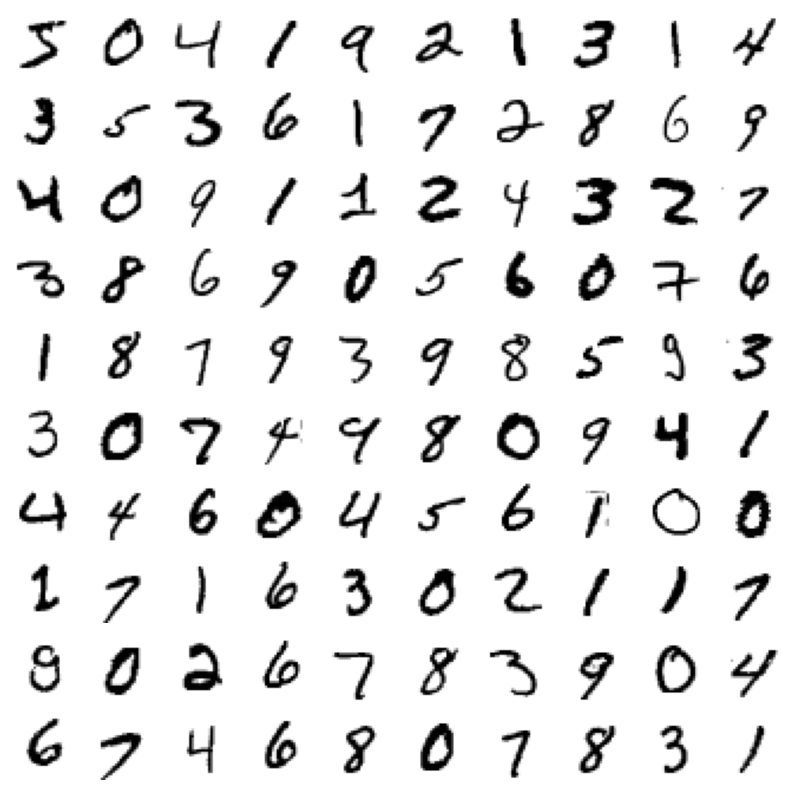

In [6]:
plt.figure(figsize=(10,10))
for i in range(100):
    digit = X.loc[i,:].to_numpy()
    digit_image = digit.reshape(28,28)
    plt.subplot(10,10,i+1)
    plt.imshow(digit_image,cmap = 'binary')
    plt.axis('off')

**Part 1:** We are going to train a k-nearest neighbor model

Import and instantiate a k-nearest neighbors model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

# instantiate the model (using the default parameters)
knn = KNeighborsClassifier()

Use a grid search to tune in the classifier hyperparameters `n_neighbors` and `weights`

In [8]:
from sklearn.model_selection import GridSearchCV

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = {
    'n_neighbors': list(range(1,15)),
    'weights': ['uniform','distance'],
}

In [9]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X, y)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [10]:
pd.DataFrame(grid.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.089362      0.009971         0.656905        0.099262   
1        0.101665      0.023635         0.518150        0.075925   
2        0.099364      0.023466         0.392913        0.088190   
3        0.087710      0.020245         0.323510        0.051651   
4        0.088442      0.012647         0.348986        0.061940   
5        0.082514      0.013569         0.330154        0.067531   
6        0.089619      0.024073         0.376956        0.057409   
7        0.085957      0.011092         0.333271        0.051800   
8        0.088050      0.011799         0.368813        0.056560   
9        0.085740      0.016888         0.340980        0.036059   
10       0.093147      0.016433         0.409104        0.074940   
11       0.100069      0.030842         0.313962        0.042662   
12       0.098728      0.025519         0.371638        0.046323   
13       0.086996      0.019698         0.348989        0.051217   
14       0.091163      0.016112         0.351508        0.032073   
15       0.089529      0.025129         0.315246        0.030755   
16       0.084223      0.008842         0.351142        0.047497   
17       0.093489      0.019165         0.304084        0.038550   
18       0.090352      0.017464         0.370548        0.048192   
19       0.089128      0.026284         0.360905        0.061540   
20       0.089372      0.024848         0.348157        0.047347   
21       0.080313      0.008316         0.317001        0.031138   
22       0.083694      0.009634         0.359437        0.022455   
23       0.084712      0.010219         0.318739        0.023498   
24       0.084815      0.012325         0.348013        0.041846   
25       0.082998      0.014386         0.317537        0.045391   
26       0.082859      0.010949         0.362950        0.047648   
27       0.081346      0.011844         0.250202        0.055929   

   param_n_neighbors param_weights  \
0                  1       uniform   
1                  1      distance   
2                  2       uniform   
3                  2      distance   
4                  3       uniform   
5                  3      distance   
6                  4       uniform   
7                  4      distance   
8                  5       uniform   
9                  5      distance   
10                 6       uniform   
11                 6      distance   
12                 7       uniform   
13                 7      distance   
14                 8       uniform   
15                 8      distance   
16                 9       uniform   
17                 9      distance   
18                10       uniform   
19                10      distance   
20                11       uniform   
21                11      distance   
22                12       uniform   
23                12      distance   
24                13       uniform   
25                13      distance   
26                14       uniform   
27                14      distance   

                                        params  split0_test_score  \
0     {'n_neighbors': 1, 'weights': 'uniform'}              0.936   
1    {'n_neighbors': 1, 'weights': 'distance'}              0.936   
2     {'n_neighbors': 2, 'weights': 'uniform'}              0.918   
3    {'n_neighbors': 2, 'weights': 'distance'}              0.936   
4     {'n_neighbors': 3, 'weights': 'uniform'}              0.932   
5    {'n_neighbors': 3, 'weights': 'distance'}              0.938   
6     {'n_neighbors': 4, 'weights': 'uniform'}              0.920   
7    {'n_neighbors': 4, 'weights': 'distance'}              0.936   
8     {'n_neighbors': 5, 'weights': 'uniform'}              0.924   
9    {'n_neighbors': 5, 'weights': 'distance'}              0.932   
10    {'n_neighbors': 6, 'weights': 'uniform'}              0.920   
11   {'n_neighbors': 6, 'weights': 'distance'}              0.928   
12    {'n_neighbors': 7, 'weigh

In [11]:
# examine the best model hyperparameters
grid.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [18]:
# best classifier
knn_clf = grid.best_estimator_

**Part 2:** We'll use accuracy and a confusion matrix to evaluate the performance of our model on the test set.

In [13]:
# load test set
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/digits_test.csv'
digits_test = pd.read_csv(url)
digits_test.head()

# feature matrix and target vector
X_test = digits_test.iloc[:,0:784]
y_test = digits_test['class']

In [19]:
# import accuracy_score and confusion_matrix from sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix

# make predictions on the test set
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)


In [20]:
# accuracy
accuracy_score(y_test, y_pred)

0.9325

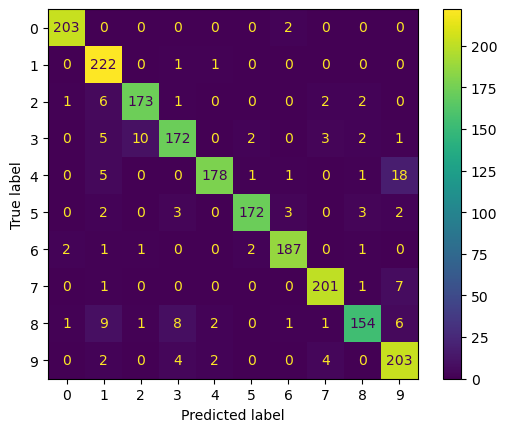

In [21]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(range(10)))
disp.plot()